In [335]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

from measurements import Ch, C1, C2, C3, Tm, zm, D_SF6w, D_SF6g, Kh, phi_m, z_phi, Vh, SA, D_column, Vi, Ci, Ti, SF6_Hcc, T_frz, T_thw

import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 4, 'lines.markersize':10})  
plt.rcParams['figure.figsize'] = 15, 12


In [336]:
tend = 800 ## hours
dt = 0.1
dx = 0.2 ## cm
L = 40 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi = ( 0.99 - 0.7 ) * np.exp( -x / 10 ) + 0.7
# phi = 0.8
Chs = np.zeros(t.shape) #
Fx = np.zeros(t.shape)

In [337]:
dT = Tm[1::2] - Tm[::2]
dCh = (Ch[1::2] - Ch[::2])
Mi = Ci*Vi # mass injected
h_inj = Vi/SA/phi

In [338]:
# plt.plot(x, phi)
# plt.scatter(z_phi, phi_m, label='Measured')
# plt.legend()

In [339]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [340]:
# SF6_init = np.zeros(x.size)
# SF6_init[x > 0] = 0
# SF6_init[x > 18-h_inj/2] = Ci[0]
# SF6_init[x > 18+h_inj/2] = 0.
# SF6_init[x > 18-h_inj/2] = Ci[0]*10
# SF6_init[x > 18+h_inj/2] = 0.

In [341]:
# plt.plot(SF6_init)

In [342]:
# theta=0.995
k=15
# ftc.add_species(is_solute=True, element='SF6w', D=k*D_SF6w, init_C=0, bc_top=0., bc_top_type='flux', bc_bot=0., bc_bot_type='flux')
ftc.add_species(is_solute=True, element='SF6g', D=k*D_SF6w, init_C=0, bc_top=0., bc_top_type='constant', bc_bot=0., bc_bot_type='flux', rising_velocity=0.02)
# ftc.add_species(is_solute=True, element='tracer', D=D_SF6g, init_C=1, bc_top=0., bc_top_type='flux', bc_bot=0., bc_bot_type='flux')
# ftc.add_henry_law_equilibrium(aq='SF6w', gas='SF6g', Hcc=SF6_Hcc)

In [343]:
# ftc.constants['k_b'] = 16e-6
# # ftc.constants['k_b'] = 4e-5
# ftc.constants['k_f'] = ftc.constants['k_b']/SF6_Hcc
# ftc.rates['Rb'] = 'k_b * SF6g'
# ftc.rates['Rf'] = 'k_f * SF6w'
# ftc.dcdt['SF6w'] = 'Rb-Rf'
# ftc.dcdt['SF6g'] = '-Rb+Rf'
# Fx = np.zeros(t.size)

In [344]:
for i in range(0, len(ftc.time)):
    if (ftc.time[i] > 120 and ftc.time[i] < 288) or (ftc.time[i] > 456 and ftc.time[i] < 624) or (ftc.time[i] > 792 and ftc.time[i] < 1008):
        ftc.change_boundary_conditions('SF6g', i, bc_top=0., bc_top_type='flux')
    else:
        ftc.change_boundary_conditions('SF6g', i, bc_top=0, bc_top_type='constant')
    if any([ftc.time[i] == T_inj for T_inj in Ti]):
        SF6_add = np.zeros(x.size)
        SF6_add[x > 0] = 0
        SF6_add[x > 18-h_inj/2] = Ci[Ti==ftc.time[i]][0]
        SF6_add[x > 18+h_inj/2] = 0.
        new_profile = ftc.profiles['SF6g'] + SF6_add
        ftc.change_concentration_profile('SF6g', i, new_profile)

    ftc.integrate_one_timestep(i)
        

In [345]:
# ftc.plot_profile('SF6g'),
# plt.scatter([C1[Tm==80], C2[Tm==80], C3[Tm==80]], [-9,-21,-33])

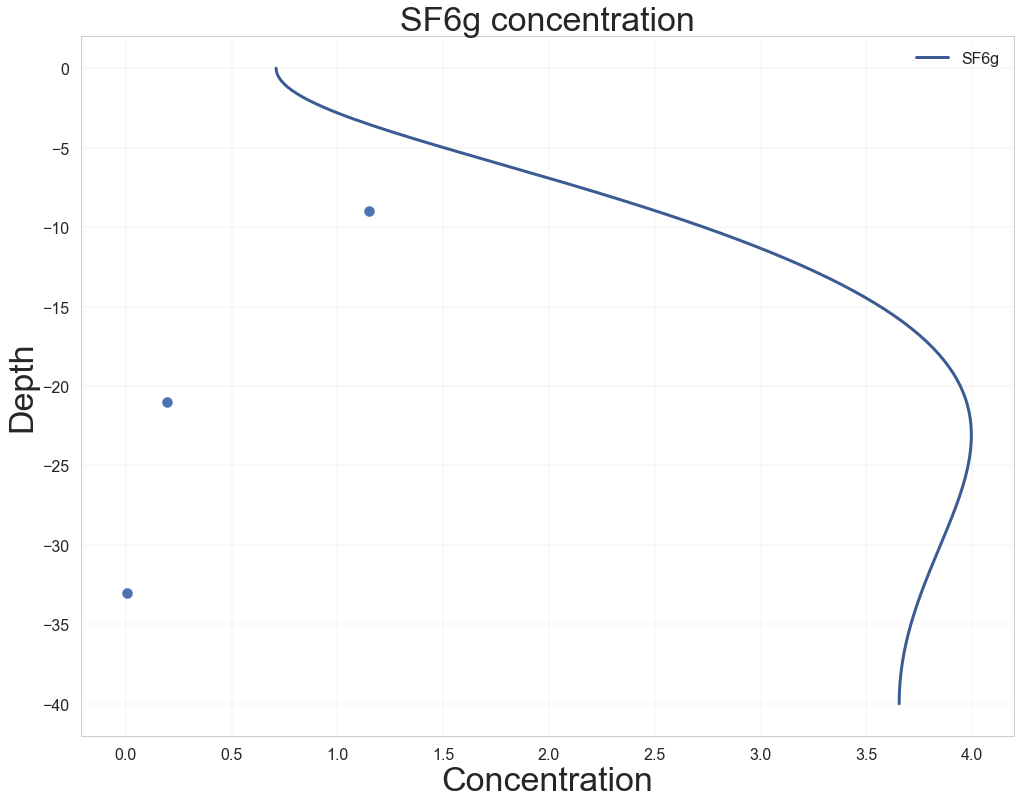

In [346]:
ftc.plot_profile('SF6g'),
plt.scatter([C1[Tm==98], C2[Tm==98], C3[Tm==98]], [-9,-21,-33])
# plt.scatter(C2[7], -21)
# plt.scatter(C3[7], -33)

24

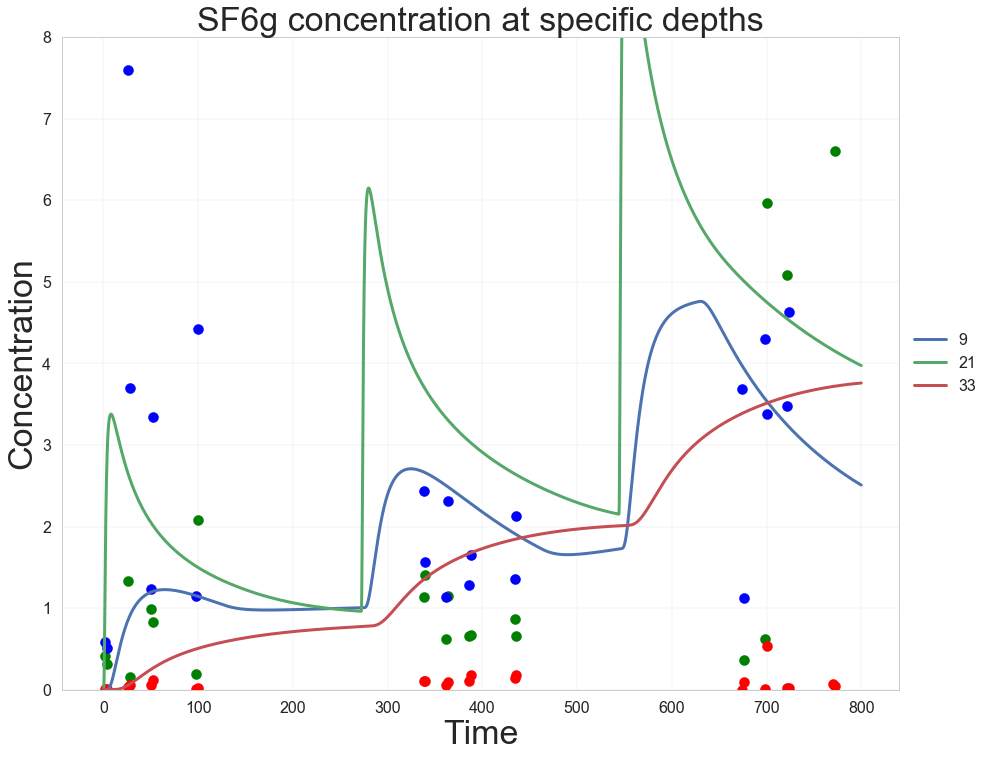

In [347]:
ftc.plot_depths('SF6g', depths=[9,21,33], time_to_plot=800)
plt.scatter(Tm, C2, color='g')
plt.scatter(Tm, C1, color='b')
plt.scatter(Tm, C3, color='r')
# plt.xlim([0,80])
plt.ylim([0,8])
len(C2)

In [348]:
Fx

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

(-1, 2)

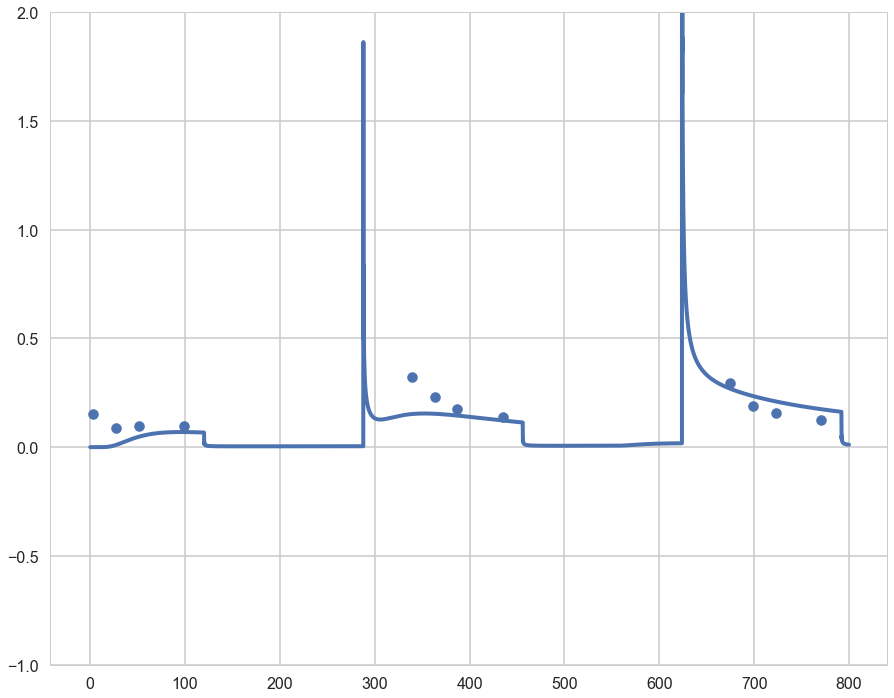

In [349]:
F = ftc.estimate_flux_at_top('SF6g') # gas flux

plt.plot(ftc.time, F)
# plt.plot(T_frz, [0] )
# F2 = ftc.estimate_flux_at_top('SF6w') # dissolved gas flux
# plt.plot(ftc.time, F2)

plt.scatter((Tm[::2]+1), dCh*Vh/SA/dT)
plt.ylim([-1,2])

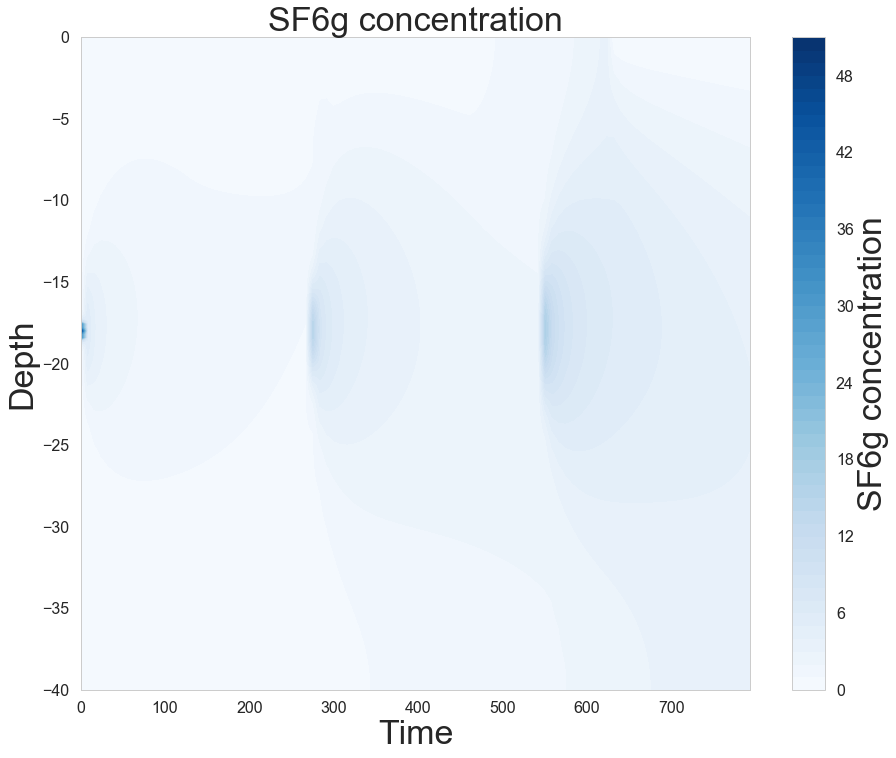

In [350]:
ftc.plot_contourplots(labels=False)

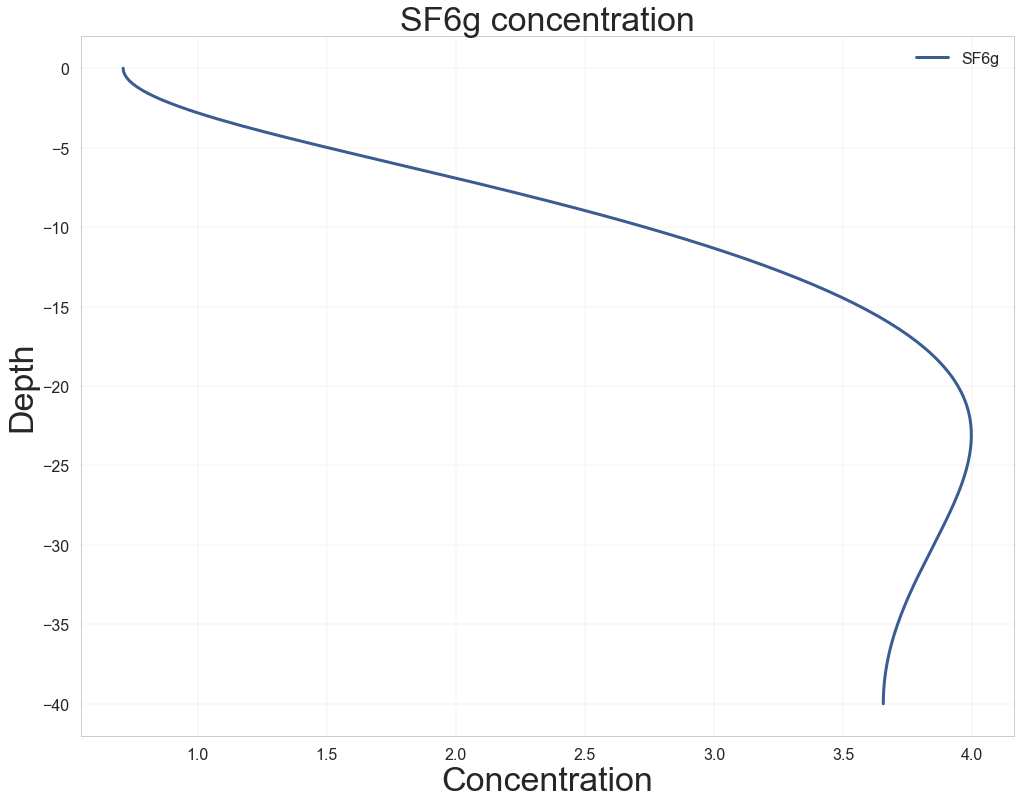

In [351]:
ftc.plot_profiles()

$${\displaystyle H^{cc}=c_{\text{a}}/c_{\text{g}}}$$

(0, 8)

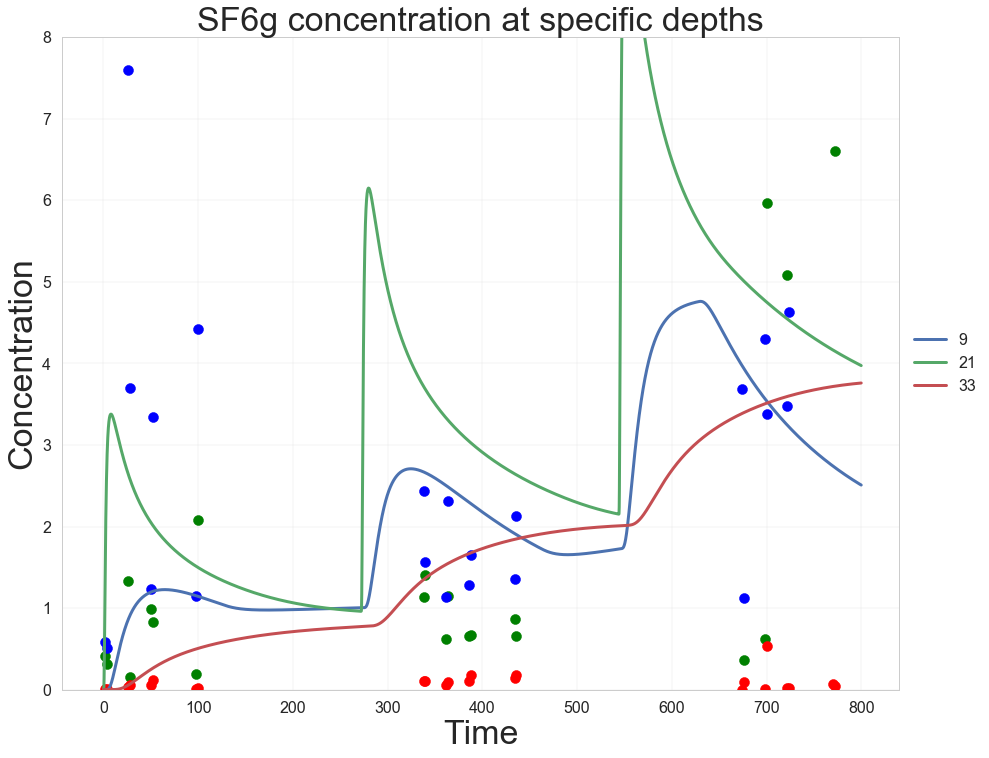

In [352]:
# 9, 21,33
ftc.plot_depths('SF6g', depths=[9,21,33], time_to_plot=False)
plt.scatter(Tm, C2, color='g')
plt.scatter(Tm, C1, color='b')
plt.scatter(Tm, C3, color='r')
# plt.xlim([0,160])
plt.ylim([0,8])

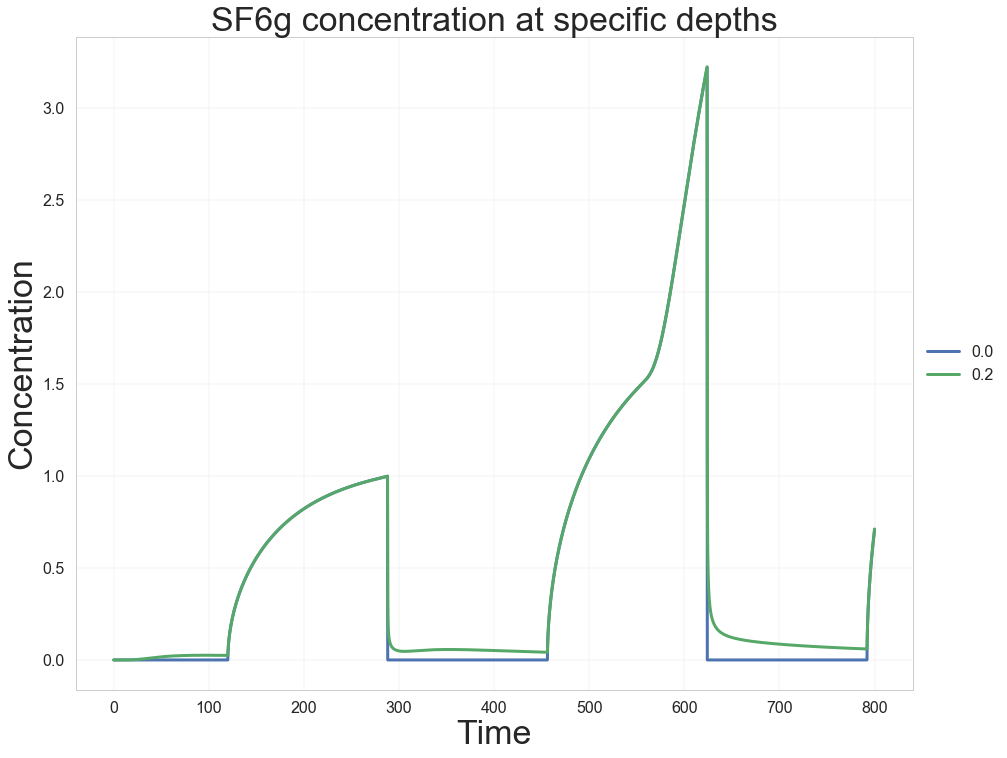

In [353]:
ftc.plot_depths('SF6g', depths=[0.0, 0.2,], time_to_plot=False)

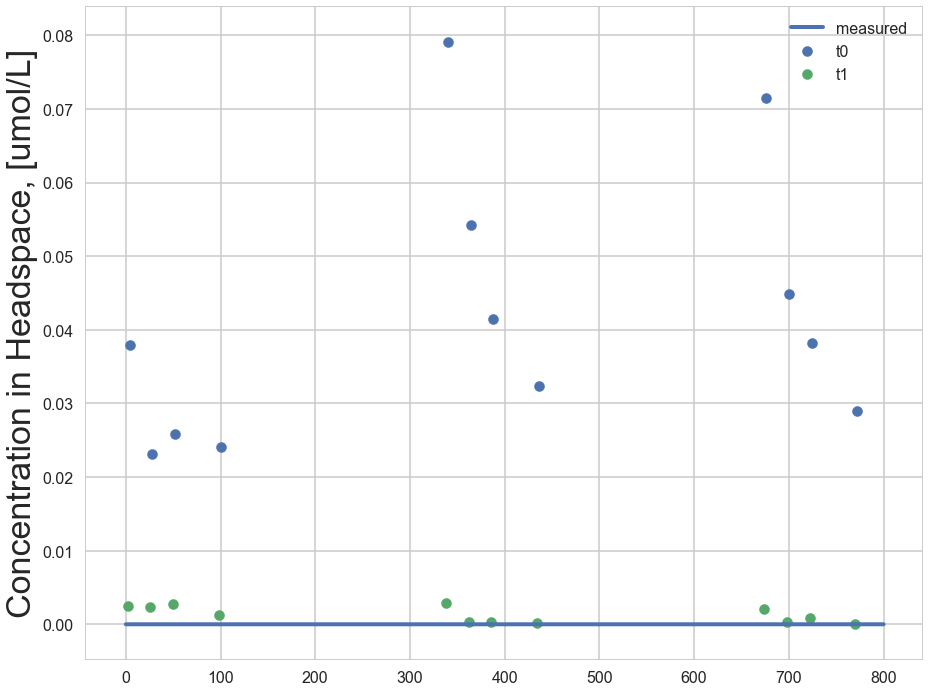

In [354]:
plt.plot(ftc.time, Chs, label='measured')
plt.scatter(Tm[1::2], Ch[1::2], label='t0')
plt.scatter(Tm[::2], Ch[::2], label='t1')
plt.ylabel('Concentration in Headspace, [umol/L]')
plt.legend()

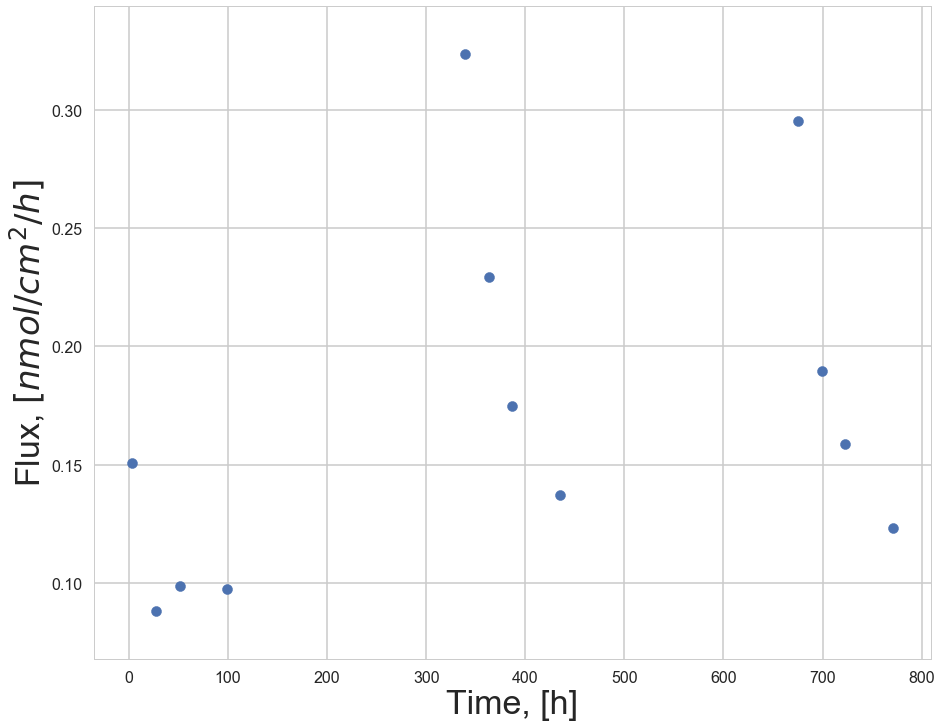

In [355]:
plt.scatter(Tm[::2]+1, dCh*Vh/SA/dT)
# plt.ylim([0, 0.4e-3])
plt.ylabel(r'Flux, $[nmol/cm^2/h]$')
plt.xlabel('Time, [h]')

# 